In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

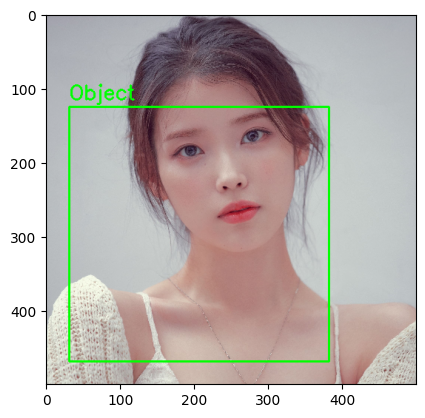

In [7]:
# orb 객체 생성
orb = cv2.ORB_create()

img = cv2.imread('./data/IU.jpg')
img = cv2.resize(img, (500,500))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 키포인트, 디스크립터 추출
keypoints, descriptors = orb.detectAndCompute(img_gray, None)

# 대상이미지
img_target = img.copy()
img_gray_target = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 대상이미지 키포인트, 디스크립터 추출
target_keypoints, target_descriptors = orb.detectAndCompute(img_gray_target, None)

# 매칭 결과 검출
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(descriptors, target_descriptors)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과가 일정 거리 이하인 경우 객체로 인식
if len(matches) > 10:
    object_found = True
    # 객체 위치 추출
    object_points = [keypoints[m.queryIdx].pt for m in matches]
    target_points = [target_keypoints[m.trainIdx].pt for m in matches]
    
    # 객체 경계상자 계산
    object_x, object_y, object_w, object_h = cv2.boundingRect(np.float32(object_points))
    target_x, target_y, target_w, target_h = cv2.boundingRect(np.float32(target_points))
    
    # 경계상자 그리기
    cv2.rectangle(img_target, (object_x, object_y), (object_x+object_w, object_y+object_h), (0, 255, 0), 2)
    cv2.putText(img_target, 'Object', (object_x, object_y -10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.imshow(img_target)
plt.show()